# PREDICTIVE MODELS WITH SKTIME 

In [1]:
#pip install sktime[all_extras]
#pip install pmdarima

In [13]:
#calling packages and dependencies that I go to use in this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
import panel as pn
import pickle
import datetime as dt
import sktime as sk
from sktime.forecasting.arima import AutoARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import warnings
warnings.filterwarnings('ignore')

In [14]:
#Loading data

data = pd.read_csv('train.csv', names = ['Date', 'y'], skiprows =1)

data

,Date,y
0,01.01.15,1.91157
1,01.02.15,1.44733
2,01.03.15,1.89355
3,01.04.15,2.03274
4,01.05.15,2.27843
...,...,...
81,NaN,NaN
82,NaN,NaN
83,NaN,NaN
84,NaN,NaN


In [15]:
#Descriptive statistics of the dependant variable

data['y'].describe()

count    74.000000
mean      2.474047
std       0.593002
min       1.447330
25%       1.980592
50%       2.444870
75%       2.919247
max       3.791290
Name: y, dtype: float64

In [16]:
#Review the columns' types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    74 non-null     object 
 1   y       74 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


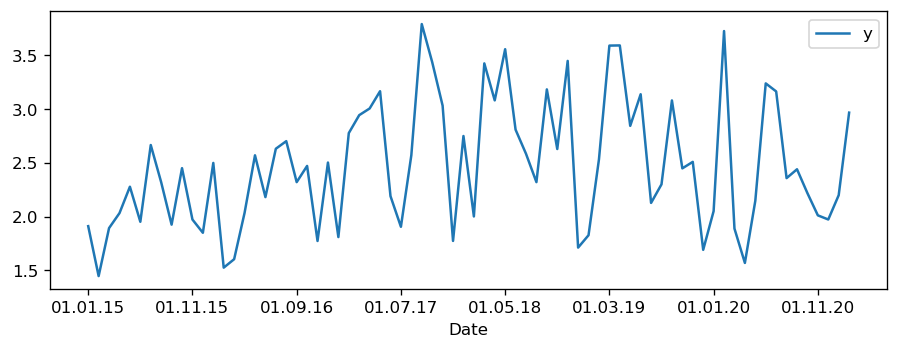

In [17]:
#With this plot I can see the data distribution in the time serie

data.plot("Date", "y");

In [18]:
#Changing the date format from object to datetime

data['Date'] = pd.to_datetime(data['Date'], format = '%d.%m.%y')

data

,Date,y
0,2015-01-01,1.91157
1,2015-02-01,1.44733
2,2015-03-01,1.89355
3,2015-04-01,2.03274
4,2015-05-01,2.27843
...,...,...
81,NaT,NaN
82,NaT,NaN
83,NaT,NaN
84,NaT,NaN


In [19]:
#Using strfrime to format a date according to a specified format string.

data["Date"] = data["Date"].dt.strftime("%d.%m.%y")

data

,Date,y
0,01.01.15,1.91157
1,01.02.15,1.44733
2,01.03.15,1.89355
3,01.04.15,2.03274
4,01.05.15,2.27843
...,...,...
81,NaN,NaN
82,NaN,NaN
83,NaN,NaN
84,NaN,NaN


In [20]:
#Building the different subsets, train dataset and test dataset

train = data.iloc[:-12]

test = data.iloc[-12:]

In [21]:
#Fit the first model

autoarima_model = AutoARIMA(suppress_warnings=True,
                           stepwise = True,
                           trace = True)

autoarima_model.fit(train["y"]) #Fit the model

forecast_steps = 12 #I select 12 steps because I want to predict the next year in twelve periods (months)

forecast = autoarima_model.predict(fh=pd.RangeIndex(start=1, 
                                                    stop=forecast_steps + 1)) #Generating the forecast model with AUTOARIMA 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=135.896, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=158.007, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=152.346, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=132.889, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=156.039, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=131.958, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=133.936, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=133.691, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=134.361, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=130.523, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=131.358, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=132.510, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=132.380, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=130.866, 

In [22]:
#Descriptive statistics of the predicted variable

forecast.describe()

count    12.000000
mean      2.476590
std       0.032291
min       2.467269
25%       2.467269
50%       2.467269
75%       2.467269
max       2.579128
Name: y, dtype: float64

In [23]:
(autoarima_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   74
Model:               SARIMAX(0, 1, 2)   Log Likelihood                 -62.262
Date:                Wed, 07 Feb 2024   AIC                            130.523
Time:                        18:01:36   BIC                            137.395
Sample:                             0   HQIC                           133.262
                                 - 74                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6902      0.110     -6.252      0.000      -0.907      -0.474
ma.L2         -0.1867      0.110     -1.692      0.091      -0.403       0.030
sigma2         0.3165      0.063      4.996      0.000       0.192       0.441
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.84
Prob(Q):                              0.90   Prob(JB):                         0.66
Heteroskedasticity (H):               2.48   Skew:                            -0.03
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# This model is a SARIMA model (0, 1, 2)

### AR (0) = indicates that there is no autoregressive term in the model, meaning that the current value of the time series is not directly influenced by its own past values.

### I (1) = indicates that the time series is differenced once to remove any non-stationarity or trend. Differencing involves subtracting the previous value from the current value, which helps to make the data more stationary.

### MA (2) =  suggests that there are two rolling average terms in the model. Rolling average models use past forecast errors to predict future values. In this case, the model considers the previous two forecast errors when making predictions.

In [24]:
# I've created a date range from the last train report data until the last data I wanted to predict

start_date = "2021-03-01"
end_date = "2022-02-01"
date_range = pd.date_range(start=start_date, end=end_date, freq="MS")

In [25]:
# Joining the date range and predicted data to create the test document.

test["Date"] = date_range
test["Date"] = test["Date"].dt.strftime("%d.%m.%y")
test["y"] = forecast

In [26]:
#I select 12 steps because I want to predict the next year in twelve periods (months)

forecast_steps = 12

##### The initial y's mean is relatively equal to the mean of data predict 2.47659 ~ 2.47404

##### I've decided choose AutoARIMA model because use a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

In [27]:
#Joining the train dataset with test dataset to obtain the last result

test = pd.concat([train, test], axis = 0)
test

,Date,y
0,01.01.15,1.911570
1,01.02.15,1.447330
2,01.03.15,1.893550
3,01.04.15,2.032740
4,01.05.15,2.278430
...,...,...
81,01.10.21,2.467269
82,01.11.21,2.467269
83,01.12.21,2.467269
84,01.01.22,2.467269


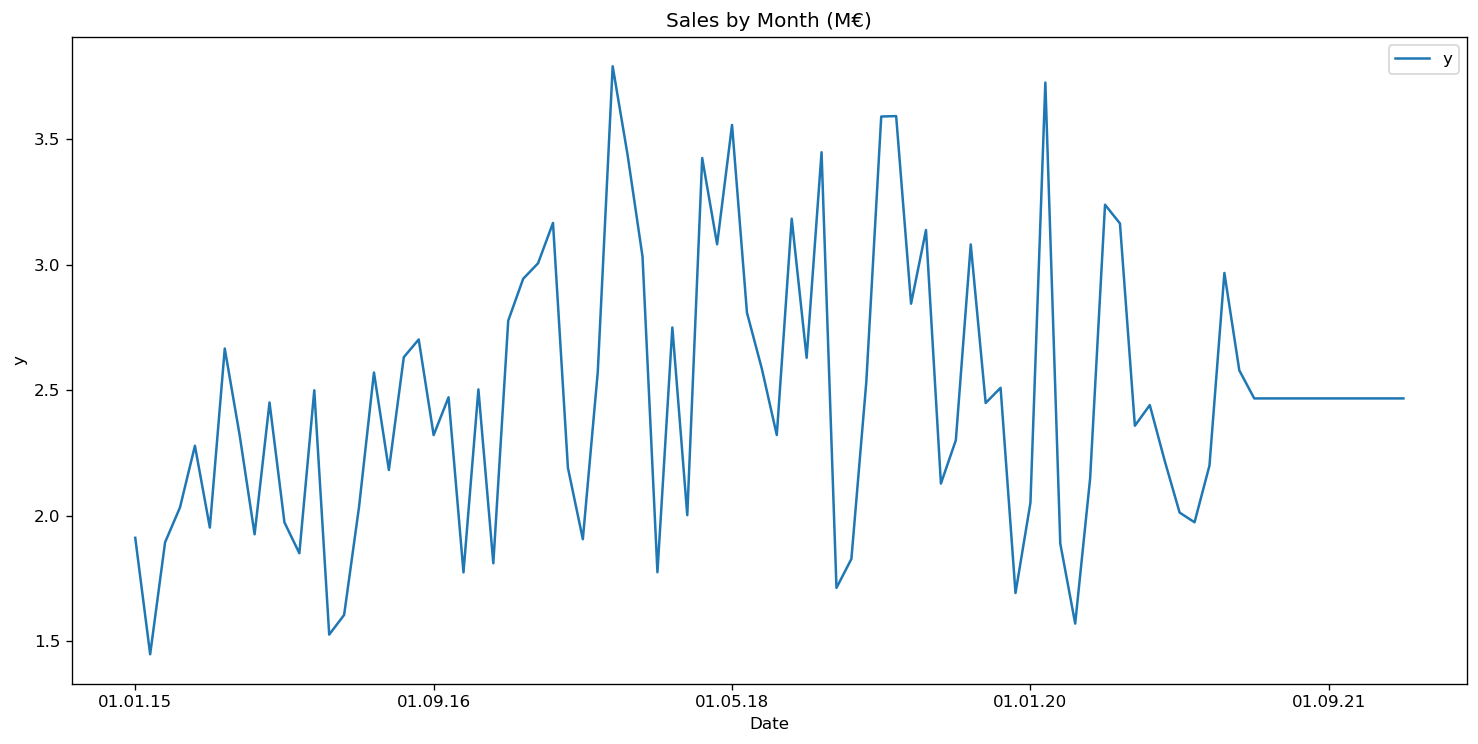

In [33]:
test.plot("Date", "y" ,title = 'Sales by Month (M€)', xlabel = 'Date', ylabel = 'y', figsize = (15, 7));

In [30]:
# Write the results of test data in csv file 

test.to_csv("test.csv")

# Predictive Models with PMDARIMA

### I've chosen the previous model because is the best selected model through AUTOARIMA PROCESS, but I've done different trials with different librarys. For the next steps I´ve used PMDARIMA library.

In [31]:
data = test
data

,Date,y
0,01.01.15,1.911570
1,01.02.15,1.447330
2,01.03.15,1.893550
3,01.04.15,2.032740
4,01.05.15,2.278430
...,...,...
81,01.10.21,2.467269
82,01.11.21,2.467269
83,01.12.21,2.467269
84,01.01.22,2.467269


In [34]:
# Changing the date format from object to datetime

data['Date'] = pd.to_datetime(data['Date'].astype(str), format = '%d.%m.%y')
data

,Date,y
0,2015-01-01,1.911570
1,2015-02-01,1.447330
2,2015-03-01,1.893550
3,2015-04-01,2.032740
4,2015-05-01,2.278430
...,...,...
81,2021-10-01,2.467269
82,2021-11-01,2.467269
83,2021-12-01,2.467269
84,2022-01-01,2.467269


In [35]:
# Transforming Date variable to index.

data = data.set_index(['Date'])
data

,y
Date,
2015-01-01,1.911570
2015-02-01,1.447330
2015-03-01,1.893550
2015-04-01,2.032740
2015-05-01,2.278430
...,...
2021-10-01,2.467269
2021-11-01,2.467269
2021-12-01,2.467269


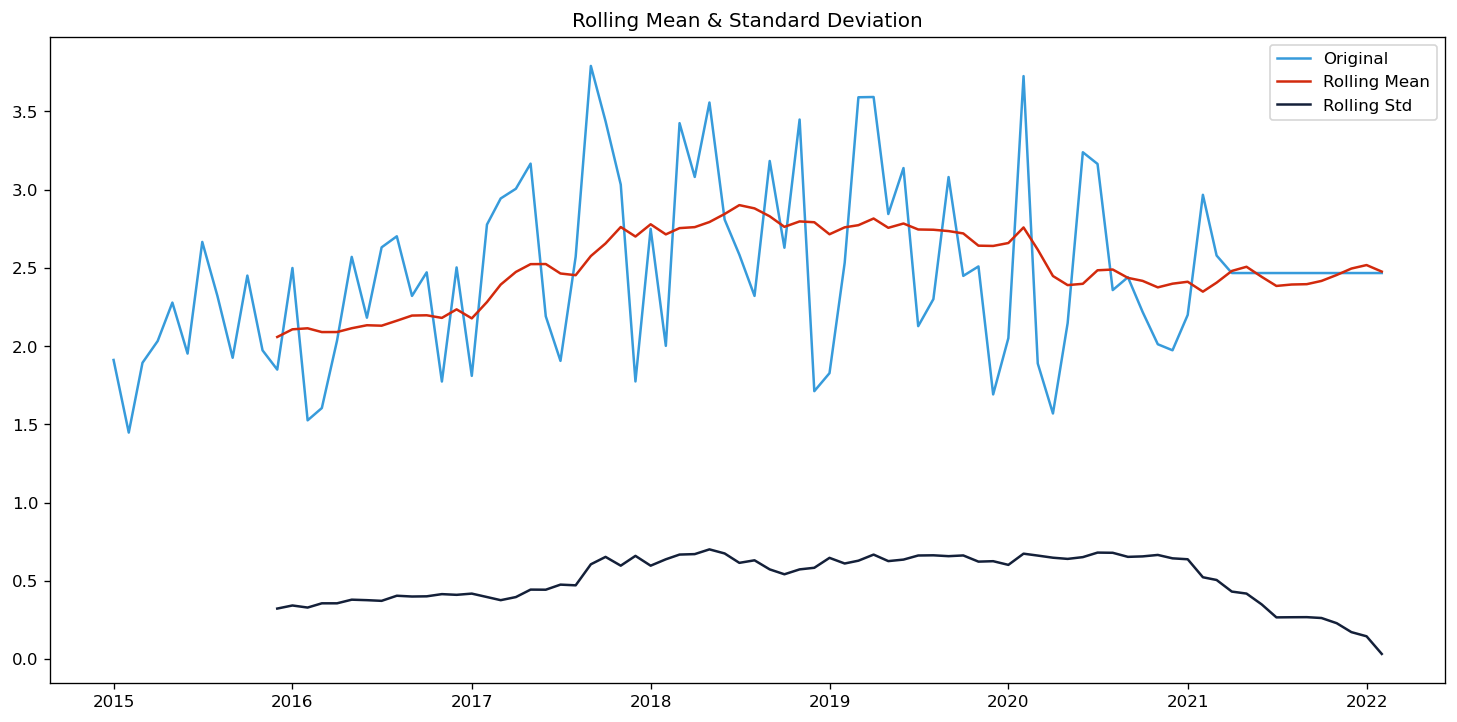

In [38]:
data['rolling_avg'] = data['y'].rolling(window =12).mean() # Calculate Rolling Mean
data['rolling_std'] = data['y'].rolling(window =12).std() # Calculate Rolling Std


# Plot Rolling variables vs Original variable.

plt.figure(figsize = (15, 7))
plt.plot(data['y'], color = '#379BDB', label = 'Original')
plt.plot(data['rolling_avg'], color = '#D22A0D', label = 'Rolling Mean')
plt.plot(data['rolling_std'], color = '#142039', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [37]:
ARIMA_model = pm.auto_arima(data['y'],
                        test = 'adf',
                        m = 1,
                        d = None,
                        trace = True,
                        suppress_warnings = True,
                        stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=143.308, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=170.808, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=163.694, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=140.672, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=168.817, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=139.311, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=141.297, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=141.161, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=141.632, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=137.834, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=139.203, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=139.820, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=139.687, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=138.239, 

In [62]:
(ARIMA_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   86
Model:               SARIMAX(0, 1, 2)   Log Likelihood                 -65.917
Date:                Wed, 07 Feb 2024   AIC                            137.834
Time:                        16:36:46   BIC                            145.162
Sample:                    01-01-2015   HQIC                           140.782
                         - 02-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6916      0.094     -7.333      0.000      -0.876      -0.507
ma.L2         -0.1871      0.095     -1.976      0.048      -0.373      -0.002
sigma2         0.2717      0.044      6.115      0.000       0.185       0.359
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.06
Prob(Q):                              0.90   Prob(JB):                         0.97
Heteroskedasticity (H):               1.21   Skew:                             0.01
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# This model is a SARIMA model (0, 1, 2) (0, 0, 0)

### AR (0) = indicates that there is no autoregressive term in the model, meaning that the current value of the time series is not directly influenced by its own past values.

### I (1) = indicates that the time series is differenced once to remove any non-stationarity or trend. Differencing involves subtracting the previous value from the current value, which helps to make the data more stationary.

### MA (2) =  suggests that there are two rolling average terms in the model. Rolling average models use past forecast errors to predict future values. In this case, the model considers the previous two forecast errors when making predictions.

### (0, 0, 0) = indicates that there are no seasonal autoregressive, seasonal integrated, or seasonal moving average terms in the model.

#####  This model is suitable for time series data that exhibits a seasonal pattern and requires differencing to achieve stationarity. It uses past values and errors to forecast future values in the time series.

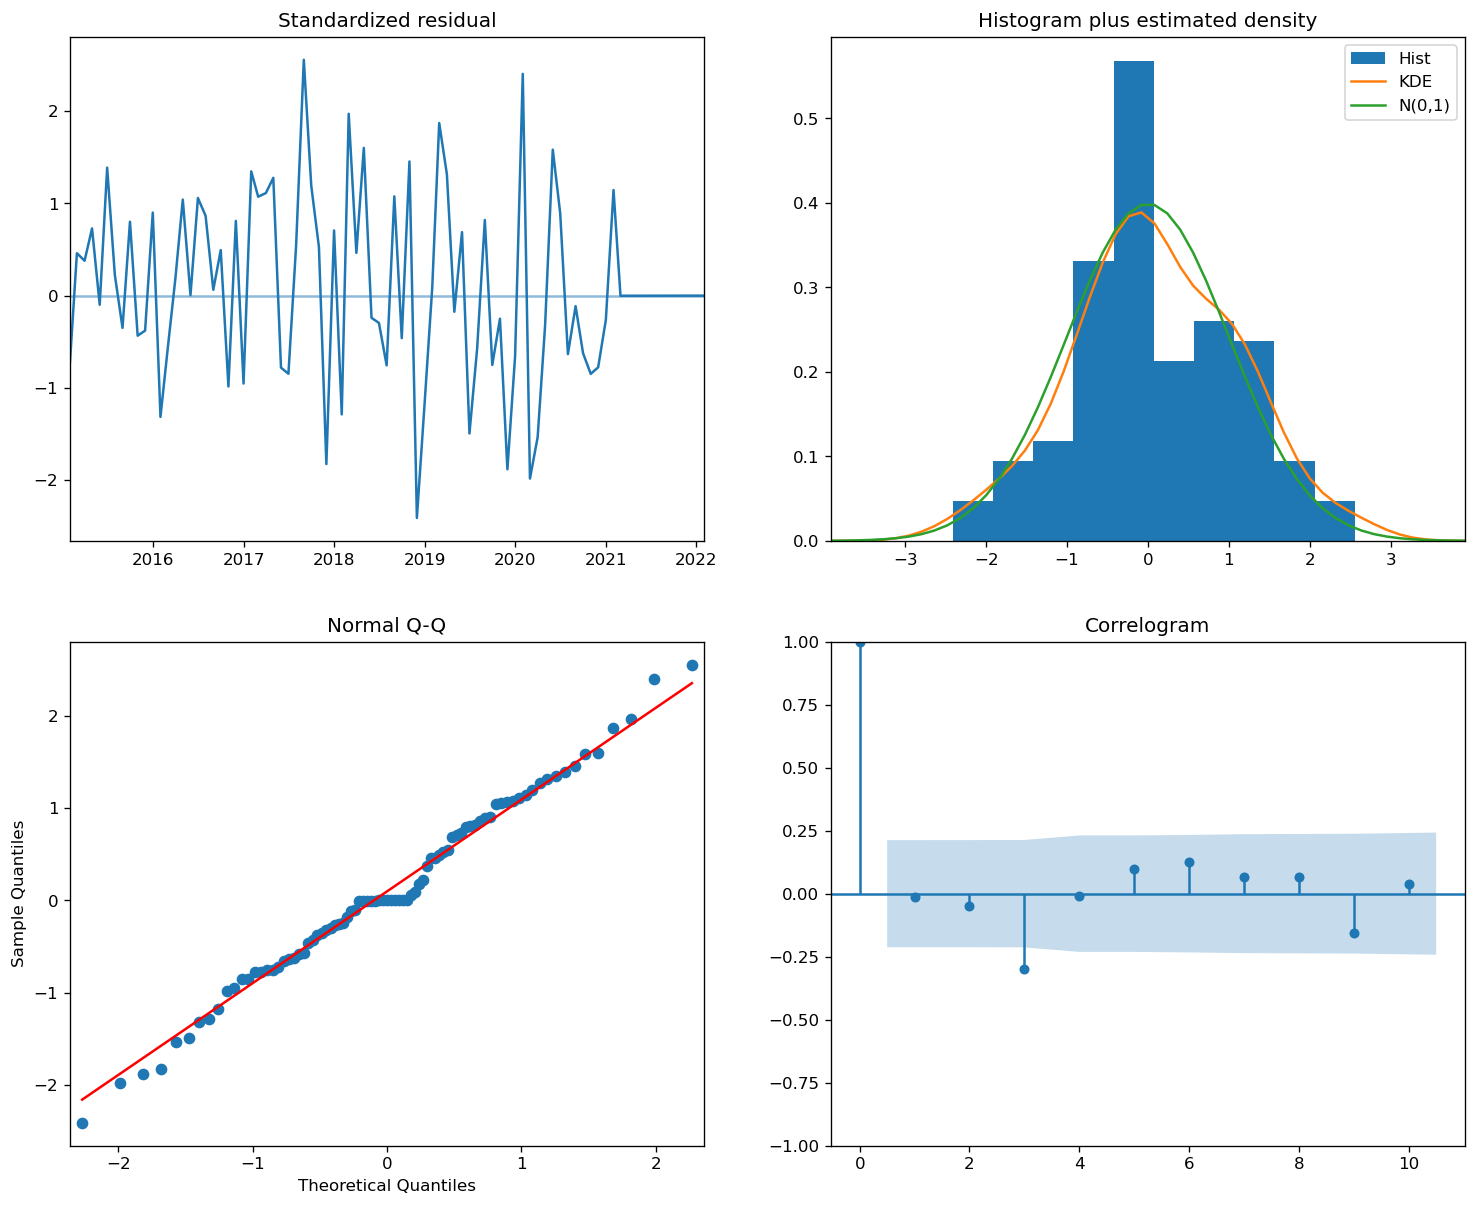

In [41]:
#Diagnostics graphs of SARIMA (0 1 2) (0 0 0).

(ARIMA_model.plot_diagnostics(figsize =(15, 12)))
plt.show()

In [44]:
SARIMA_model = pm.auto_arima(data['y'],
                            test = 'adf',
                            start_p = 1, start_q = 1,
                            max_p = 3, max_q = 3,
                            m = 12,
                            start_P = 0,
                            seasonal = True,
                            d = None,
                            D = 1,
                            trace = True,
                            error_action = 'ignore',
                            suppress_warnings = True,
                            stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=145.714, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=155.996, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=150.348, Time=0.09 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=144.124, Time=0.13 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=154.737, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=155.546, Time=0.04 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=150.627, Time=0.09 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=146.632, Time=0.10 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=144.923, Time=0.16 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=143.736, Time=0.13 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=155.601, Time=0.05 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=in

In [45]:
(SARIMA_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   86
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 -68.663
Date:                              Wed, 07 Feb 2024   AIC                            143.327
Time:                                      18:31:04   BIC                            150.239
Sample:                                  01-01-2015   HQIC                           146.084
                                       - 02-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2773      0.099      2.806      0.005       0.084       0.471
ma.S.L12      -0.6833      0.114     -5.969      0.000      -0.908      -0.459
sigma2         0.3381      0.053      6.352      0.000       0.234       0.442
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.75   Prob(JB):                         0.62
Heteroskedasticity (H):               0.98   Skew:                             0.22
Prob(H) (two-sided):                  0.96   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# This model is a SARIMA model (0, 1, 2) (0, 1, 1, [12])

### AR (0) = indicates that there is no autoregressive term in the model, meaning that the current value of the time series is not directly influenced by its own past values.

### I (1) = indicates that the time series is differenced once to remove any non-stationarity or trend. Differencing involves subtracting the previous value from the current value, which helps to make the data more stationary.

### MA (2) =  suggests that there are two rolling average terms in the model. Rolling average models use past forecast errors to predict future values. In this case, the model considers the previous two forecast errors when making predictions.

### (0, 1, 1) = indicates that there are no seasonal autoregressive, seasonal integrated, or seasonal moving average terms in the model.

### Seasonal AR order (P) = 0, indicating no seasonal autoregressive terms.

### Seasonal I order (D) = 1, suggesting that seasonal differencing is applied once.

### Seasonal MA order (Q) = 1, signifying that one past seasonal forecast error is considered.

### Seasonality (s) = 12, representing a seasonal period of 12 units.

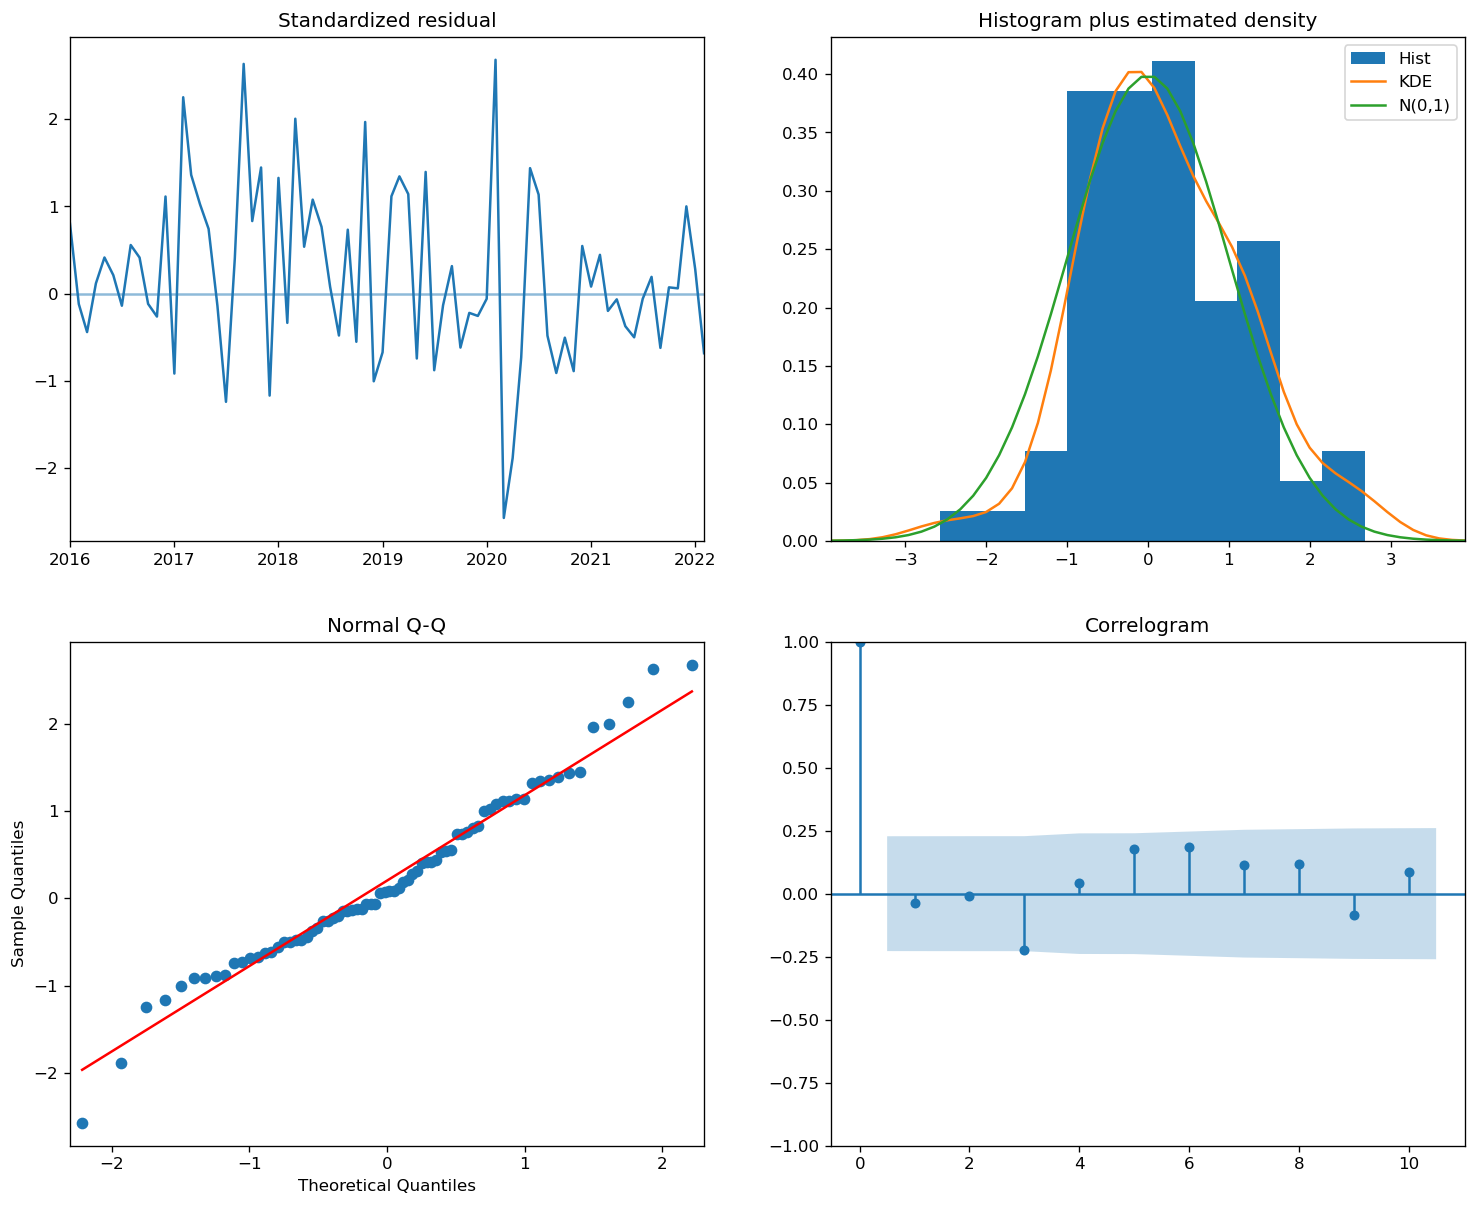

In [83]:
(SARIMA_model.plot_diagnostics(figsize =(15, 12)))
plt.show()

### To conclude the analysis, we would like to comment on the following: The reason why I have selected the first model (the one performed with SKTIME) is because once reviewed the diagnostic returned by the summary the AIC ratio was the lowest among all the models analyzed.

### This ratio is Akaike Information Criterion, which is a measure of the relative quality of statistical models for a given set of data. "Minor AIC" refers to the goal of finding a statistical model that best fits the data